## Monte Carlo simulation MAMR1C 2T

<img src="MAR1C-RN.PNG" width="400"> 

In [55]:
__author__ ='Sung Chung'

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import datetime

pd.set_option('display.max_column',500)

### input 
V0=100

T0=0
PCM_FACTOR =1.0
num_samples=10000

RT_dTdW=108*PCM_FACTOR                             #RTG dT / dW slope   
RS_dTdW=62*PCM_FACTOR                             #RSG dT / dW slope 

fname="MAMR1C_" + "_" + str(V0) +"mV"
RN=1
RT, RT_sigma = 11.37,0.28  
RT0, RT0_sigma = 1.2, 0.03 
RTC, RTC_sigma = 10.17, 0.25  
RS, RS_sigma = 2.50, 0.0625 
RS0, RS0_sigma = 1.00, 0.025  
RSC, RSC_sigma = 6, 0.15 
RL0,RL0_sigma=1.45,0.036
RM0,RM0_sigma=2.49,0.062    

# RN=1
# RT, RT_sigma = 11.37,0.56  
# RT0, RT0_sigma = 1.2, 0.03 
# RTC, RTC_sigma = 10.17, 0.25  
# RS, RS_sigma = 2.50, 0.125 
# RS0, RS0_sigma = 1.00, 0.025  
# RSC, RSC_sigma = 6, 0.15 
# RL0,RL0_sigma=1.45,0.036
# RM0,RM0_sigma=2.49,0.062 


  

# RN=0
# RT, RT_sigma = 11.37,0.56  
# RT0, RT0_sigma = 1.2, 0.03 
# RTC, RTC_sigma = 0.1, 0.01  
# RS, RS_sigma = 2.50, 0.125 
# RS0, RS0_sigma = 1.00, 0.025  
# RSC, RSC_sigma = 0.1, 0.01 
# RL0,RL0_sigma=1.45,0.036
# RM0,RM0_sigma=2.49,0.062 

# RN=0
# RT, RT_sigma = 11.37,0.56  
# RT0, RT0_sigma = 1.2, 0.03 
# RTC, RTC_sigma = 0.1, 0.01  
# RS, RS_sigma = 2.50, 0.125 
# RS0, RS0_sigma = 1.00, 0.025  
# RSC, RSC_sigma = 0.1, 0.01
# RL0,RL0_sigma=1.45,0.036
# RM0,RM0_sigma=2.49,0.062 
 


def getSTOR(TG_R,SG_R,RL):
    TG_SG_resistance =  (TG_R)*(SG_R)/(TG_R+SG_R)
    STOR= (RL+TG_SG_resistance)
    return (TG_SG_resistance, STOR)

#normal distribution b 
RT_n=np.random.normal(RT,RT_sigma,num_samples)
RT0_n=np.random.normal(RT0,RT0_sigma,num_samples)
RTC_n=np.random.normal(RTC,RTC_sigma,num_samples)
RS_n=np.random.normal(RS,RS_sigma,num_samples)
RS0_n=np.random.normal(RS0,RS0_sigma,num_samples)
RSC_n=np.random.normal(RSC,RSC_sigma,num_samples)
RL0_n=np.random.normal(RL0,RL0_sigma,num_samples)
RM0_n=np.random.normal(RM0,RM0_sigma,num_samples)


df=pd.DataFrame({'RT':RT_n,'RT0':RT0_n,'RTC':RTC_n,'RS':RS_n,'RS0':RS0_n, 'RSC':RSC_n,'RL0':RL0_n,'RM0':RM0_n})

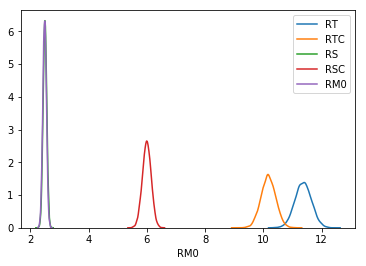

In [56]:
sns.distplot(df['RT'],hist=False,label="RT");
sns.distplot(df['RTC'],hist=False,label="RTC");
sns.distplot(df['RS'],hist=False,label="RS");
sns.distplot(df['RSC'],hist=False,label="RSC");
ax=sns.distplot(df['RM0'],hist=False,label="RM0");

,RT,RT0,RTC,RS,RS0,RSC,RL0,RM0,RTL,RSL,TG_R,SG_R,RL,TG_SG_R,STOR
count,10000.00,10000.00,10000.00,10000.00,10000.00,10000.00,10000.00,10000.00,10000.00,10000.00,10000.00,10000.00,10000.00,10000.00,10000.00
mean,11.37,1.20,10.17,2.50,1.00,6.00,1.45,2.49,11.37,7.00,22.74,9.50,3.94,6.70,10.64
std,0.28,0.03,0.25,0.06,0.02,0.15,0.04,0.06,0.25,0.15,0.38,0.17,0.07,0.09,0.11
min,10.32,1.10,9.04,2.22,0.92,5.42,1.32,2.28,10.20,6.41,21.32,8.80,3.67,6.38,10.21
25%,11.18,1.18,10.00,2.46,0.98,5.90,1.43,2.45,11.20,6.90,22.49,9.39,3.89,6.64,10.56
50%,11.37,1.20,10.17,2.50,1.00,6.00,1.45,2.49,11.37,7.00,22.74,9.50,3.94,6.70,10.64
75%,11.56,1.22,10.34,2.54,1.02,6.10,1.47,2.53,11.54,7.10,23.00,9.61,3.99,6.76,10.72
max,12.50,1.31,11.19,2.75,1.09,6.53,1.58,2.72,12.34,7.54,24.20,10.14,4.19,7.03,11.02


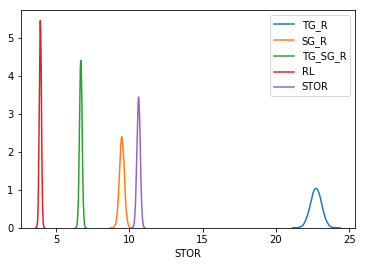

In [57]:
df['RTL']=df['RT0']+df['RTC']
df['RSL']=df['RS0']+df['RSC']

df['TG_R']=df['RT']+df['RTL']
df['SG_R']=df['RS']+df['RSL']
df['RL']=df['RL0']+df['RM0']
ans=np.vectorize(getSTOR)

df['TG_SG_R']=ans(df.TG_R,df.SG_R,df.RL)[0]
df['STOR']=ans(df.TG_R,df.SG_R,df.RL)[1]

sns.distplot(df['TG_R'],hist=False,label="TG_R");
sns.distplot(df['SG_R'],hist=False,label="SG_R");
sns.distplot(df['TG_SG_R'],hist=False,label="TG_SG_R");
sns.distplot(df['RL'],hist=False,label="RL");
sns.distplot(df['STOR'],hist=False,label="STOR",);

df.describe().round(2)

In [58]:
# Io can be calculated based on voltage at RT
# Io can be calculated based on voltage at RT
df['V_RTL']=V_RT*df['RTL']/df['RT']

if RN==1:
    df['bias_current']=V0/df['TG_SG_R'] 
else:
    df['bias_current']=(df['V_RTL']+V_RT)/df['TG_SG_R'] 


<img src="simpleSTOR.PNG" width=500> 

In [59]:
# Calculate T-Slope for SG and TG (deltaT/deltaT)
df['bias_current']=V0/df['TG_SG_R']

df['TG_iRatio']=df['SG_R']/(df['TG_R']+df['SG_R'])
df['SG_iRatio']=1-df['TG_iRatio']
df['iTG']=df['bias_current']*df['TG_iRatio']
df['iSG']=df['bias_current']-df['iTG']

df['pwRTG']=(df['iTG']**2)*df['RT']/1000
df['pwRSG']=(df['iSG']**2)*df['RS']/1000

df['dT_RTG']=RT_dTdW*df['pwRTG']
df['dT_RSG']=RS_dTdW*df['pwRSG']
df['dTemp']=df['dT_RTG']+df['dT_RSG']
df['Temp']=df['dTemp']+T0

now=datetime.datetime.now()
month=now.month
day=now.day
second=now.second
df.to_csv(fname + "-{}-{}_{}sec.csv".format(month, day, second))
df.describe().round(2)

,RT,RT0,RTC,RS,RS0,RSC,RL0,RM0,RTL,RSL,TG_R,SG_R,RL,TG_SG_R,STOR,bias_current,TG_iRatio,SG_iRatio,iTG,iSG,pwRTG,pwRSG,dT_RTG,dT_RSG,dTemp,Temp
count,10000.00,10000.00,10000.00,10000.00,10000.00,10000.00,10000.00,10000.00,10000.00,10000.00,10000.00,10000.00,10000.00,10000.00,10000.00,10000.00,10000.00,10000.00,10000.00,10000.00,10000.00,10000.00,10000.00,10000.00,10000.00,10000.00
mean,11.37,1.20,10.17,2.50,1.00,6.00,1.45,2.49,11.37,7.00,22.74,9.50,3.94,6.70,10.64,14.93,0.29,0.71,4.40,10.53,0.22,0.28,23.75,17.20,40.95,40.95
std,0.28,0.03,0.25,0.06,0.02,0.15,0.04,0.06,0.25,0.15,0.38,0.17,0.07,0.09,0.11,0.20,0.00,0.00,0.07,0.18,0.00,0.01,0.53,0.58,0.79,0.79
min,10.32,1.10,9.04,2.22,0.92,5.42,1.32,2.28,10.20,6.41,21.32,8.80,3.67,6.38,10.21,14.22,0.27,0.69,4.13,9.86,0.20,0.25,21.81,15.28,38.22,38.22
25%,11.18,1.18,10.00,2.46,0.98,5.90,1.43,2.45,11.20,6.90,22.49,9.39,3.89,6.64,10.56,14.79,0.29,0.70,4.35,10.40,0.22,0.27,23.39,16.80,40.41,40.41
50%,11.37,1.20,10.17,2.50,1.00,6.00,1.45,2.49,11.37,7.00,22.74,9.50,3.94,6.70,10.64,14.93,0.29,0.71,4.40,10.53,0.22,0.28,23.74,17.18,40.94,40.94
75%,11.56,1.22,10.34,2.54,1.02,6.10,1.47,2.53,11.54,7.10,23.00,9.61,3.99,6.76,10.72,15.06,0.30,0.71,4.45,10.65,0.22,0.28,24.10,17.59,41.47,41.47
max,12.50,1.31,11.19,2.75,1.09,6.53,1.58,2.72,12.34,7.54,24.20,10.14,4.19,7.03,11.02,15.68,0.31,0.73,4.69,11.36,0.24,0.31,26.36,19.52,44.28,44.28


In [60]:
df.head().round(2)

,RT,RT0,RTC,RS,RS0,RSC,RL0,RM0,RTL,RSL,TG_R,SG_R,RL,TG_SG_R,STOR,bias_current,TG_iRatio,SG_iRatio,iTG,iSG,pwRTG,pwRSG,dT_RTG,dT_RSG,dTemp,Temp
0,11.30,1.17,10.35,2.53,1.02,6.10,1.47,2.59,11.52,7.12,22.82,9.65,4.06,6.78,10.84,14.74,0.30,0.70,4.38,10.36,0.22,0.27,23.43,16.86,40.28,40.28
1,11.80,1.21,10.29,2.51,0.97,5.96,1.44,2.54,11.50,6.93,23.30,9.45,3.98,6.72,10.70,14.88,0.29,0.71,4.29,10.58,0.22,0.28,23.48,17.47,40.95,40.95
2,10.86,1.18,10.25,2.53,1.02,5.89,1.49,2.51,11.43,6.91,22.29,9.44,4.00,6.63,10.63,15.08,0.30,0.70,4.49,10.59,0.22,0.28,23.61,17.61,41.22,41.22
3,11.64,1.20,9.99,2.56,1.02,5.90,1.43,2.36,11.19,6.93,22.82,9.48,3.79,6.70,10.49,14.93,0.29,0.71,4.38,10.55,0.22,0.28,24.13,17.62,41.75,41.75
4,11.07,1.19,10.41,2.39,1.00,5.93,1.41,2.46,11.59,6.93,22.66,9.31,3.87,6.60,10.47,15.15,0.29,0.71,4.41,10.74,0.22,0.27,23.28,17.05,40.33,40.33


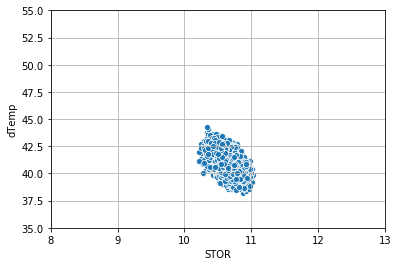

In [61]:
sns.scatterplot(x=df.STOR,y=df.dTemp)
plt.xlim(left=8, right = 13)
plt.ylim(bottom=35, top = 55)
plt.grid()

,STOR,dT_RTG,dT_RSG,dTemp
count,10000.00,10000.00,10000.00,10000.00
mean,10.64,23.75,17.20,40.95
std,0.11,0.53,0.58,0.79
min,10.21,21.81,15.28,38.22
25%,10.56,23.39,16.80,40.41
50%,10.64,23.74,17.18,40.94
75%,10.72,24.10,17.59,41.47
max,11.02,26.36,19.52,44.28


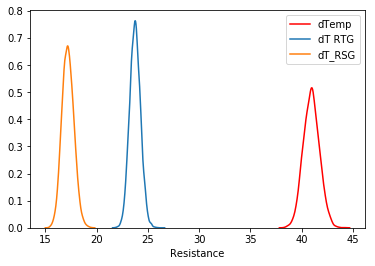

In [62]:
sns.distplot(df['dTemp'],hist=False,label='dTemp',color='r');
sns.distplot(df['dT_RTG'],hist=False,label="dT RTG");
sns.distplot(df['dT_RSG'],hist=False,label="dT_RSG");
plt.xlabel("Resistance")


df.describe().to_csv('RTG 20%, RSG: 10%, all lead 5%')
df[['STOR','dT_RTG','dT_RSG','dTemp']].describe().round(2)

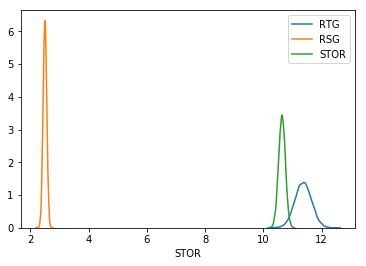

In [63]:


sns.distplot(df['RT'],hist=False,label="RTG");
sns.distplot(df['RS'],hist=False,label="RSG");
sns.distplot(df['STOR'],hist=False,label="STOR",);
# plt.xlim(left=4.7, right=6.5)
